
# Discussion Related With Outliers And Impact On Machine Learning!!

### Which Machine LEarning Models Are Sensitive To Outliers?

Naivye Bayes Classifier--- Not Sensitive To Outliers

SVM-------- Not Sensitive To Outliers

Decision Tree Regressor or Classifier---- Not Sensitive

Ensemble(RF,XGboost,GB)------- Not Sensitive

KNN--------------------------- Not Sensitive

Linear Regression---------- Sensitive To Outliers

Logistic Regression------- Sensitive To Outliers

Kmeans------------------------ Sensitive

Hierarichal------------------- Sensitive

PCA-------------------------- Sensitive

Neural Networks-------------- Sensitive

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic.csv')
df.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

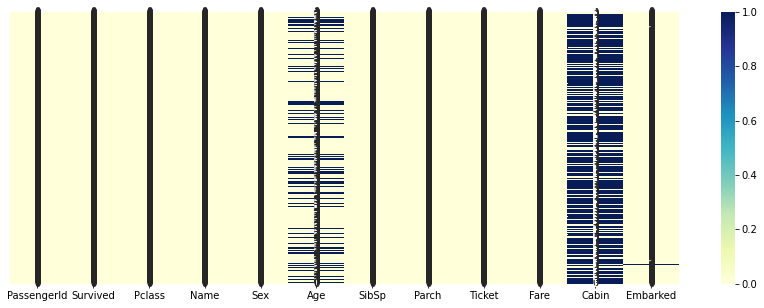

In [5]:
plt.figure(figsize= (15,5))
sns.heatmap(df.isnull(),annot = True,yticklabels = False,cmap = "YlGnBu")

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

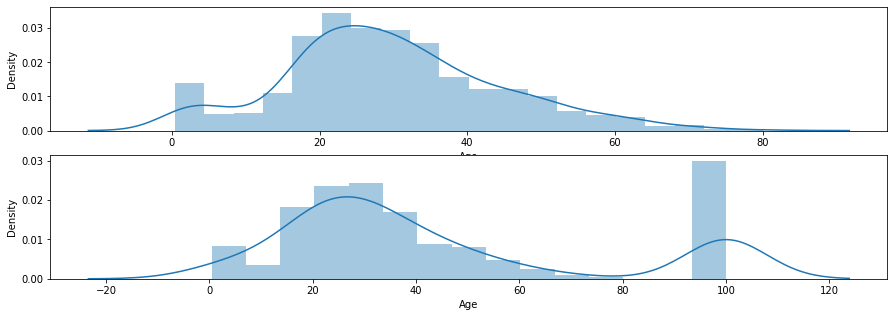

In [7]:
plt.figure(figsize = (15,5))
plt.subplot(2,1,1)
sns.distplot(df['Age'].dropna())

plt.subplot(2,1,2)
sns.distplot(df['Age'].fillna(100))

<AxesSubplot:xlabel='Age', ylabel='Density'>

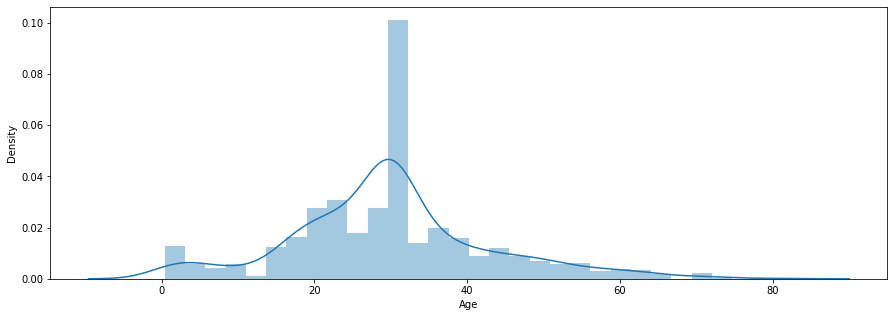

In [8]:
#acc to mean of age =30
plt.figure(figsize =(15,5))
sns.distplot(df['Age'].fillna(30))

## Gaussian Distribution

Text(0.5, 0, 'Age')

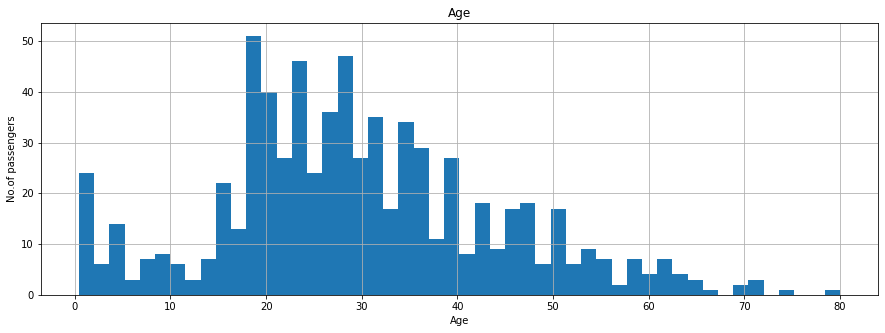

In [9]:
plt.figure(figsize=(15,5))
figure = df.Age.hist(bins=50)
#sns.histplot(df['Age'],bins = 50)
plt.title('Age')
plt.ylabel('No.of passengers')
plt.xlabel('Age')

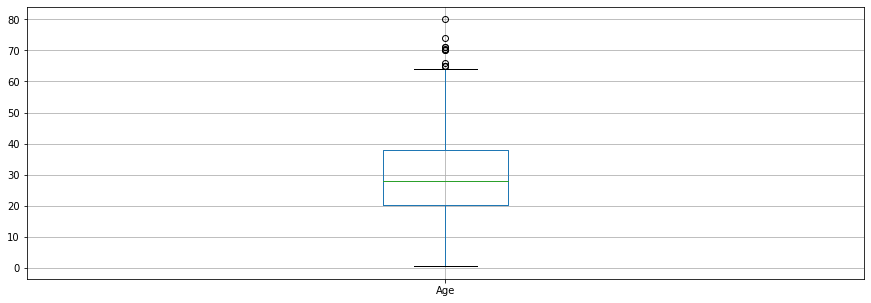

In [10]:
plt.figure(figsize = (15,5))
boxplot = df.boxplot(column ='Age')

In [13]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### if data is Normally Distributed we use this method

In [17]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
upper_boundry = df['Age'].mean() + 3*df['Age'].std()
lower_boundry = df['Age'].mean()- 3*df['Age'].std()
print(upper_boundry)
print(lower_boundry)


73.27860964406095
-13.88037434994331


### if the features are follows skewness so we use this techniques

Text(0, 0.5, 'No.of passengers')

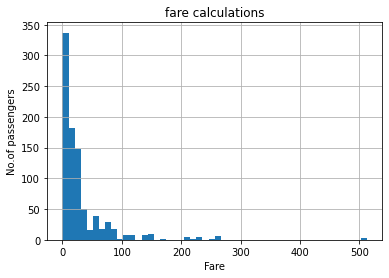

In [22]:
df.Fare.hist(bins =50)
plt.title('fare calculations')
plt.xlabel('Fare')
plt.ylabel('No.of passengers')

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

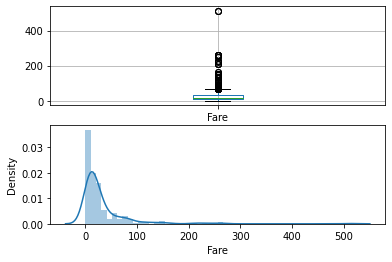

In [28]:
plt.subplot(2,1,1)
df.boxplot(column = 'Fare')

plt.subplot(2,1,2)
sns.distplot(df['Fare'])

df['Fare'].describe()

In [37]:
#let CALCuate interquantile range of boundaries
IQR = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)

upper_boundry = df['Fare'].quantile(0.75)
lower_boundry = df['Fare'].quantile(0.25)

print(IQR)
print(upper_boundry)
print(lower_boundry)

23.0896
31.0
7.9104


In [43]:
lower_bridge = lower_boundry - (IQR*3)
upper_bridge = upper_boundry + (IQR*3)
print(lower_bridge    ,'\n',      upper_bridge)

-61.358399999999996 
 100.2688


In [45]:
# datasets copy functions
data = df.copy()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
data.loc[data['Age']>=73,'Age']  = 73
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passengers')

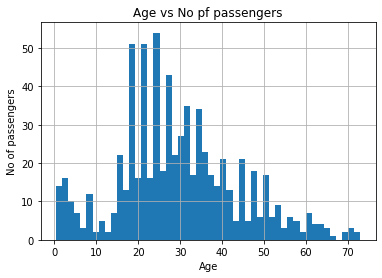

In [66]:
data.Age.hist(bins =50)
plt.title('Age vs No pf passengers')
plt.xlabel('Age')
plt.ylabel('No of passengers')

Text(0, 0.5, 'No of passengers')

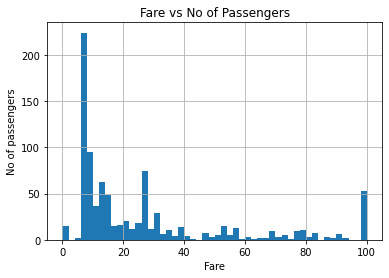

In [67]:
data.Fare.hist(bins =50)
plt.title('Fare vs No of Passengers')
plt.xlabel('Fare')
plt.ylabel('No of passengers')

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'], test_size = 0.30)

In [76]:
#LogisticsRegression
from sklearn.linear_model import LogisticRegression as LR
lr = LR()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)

In [90]:
from sklearn.metrics import accuracy_score,roc_auc_score
print('accuracy_score : {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,y_pred_proba[:,1])))

accuracy_score : 0.6753731343283582
roc_auc_score : 0.666508567024367


In [92]:
roc_auc_score(y_test,y_pred_proba[:,1])

0.666508567024367

In [99]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print('accuracy_score :{}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score : {}'.format(roc_auc_score(y_test,y_pred_proba[:,1])))

accuracy_score :0.6044776119402985
roc_auc_score : 0.666508567024367
